In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager
import matplotlib.gridspec as gridspec
import numpy as np
import datetime
from chinese_calendar import is_workday, is_holiday
import csv
import os
import shutil
import scipy.sparse as sp
import sys
from pylab import *

In [2]:
STGCN1_inflow_truth = np.load('STGCN1_taxi_inflow_groundtruth.npy')
STGCN1_inflow_prediction = np.load('STGCN1_taxi_inflow_prediction.npy')
STGCN2_inflow_truth = np.load('STGCN2_taxi_inflow_groundtruth.npy')
STGCN2_inflow_prediction = np.load('STGCN2_taxi_inflow_prediction.npy')
STGCN3_inflow_truth = np.load('STGCN3_taxi_inflow_groundtruth.npy')
STGCN3_inflow_prediction = np.load('STGCN3_taxi_inflow_prediction.npy')

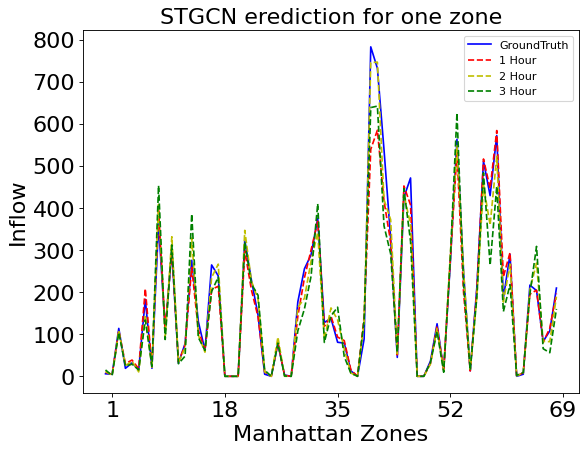

In [12]:
figure(figsize=(8, 6), dpi=80)
count = 3507
line = 1.5
plot(STGCN1_inflow_truth[0], color='b', markersize=5, linewidth=line,  label='GroundTruth')
plot(STGCN1_inflow_prediction[0], color='r', linestyle='dashed', linewidth=line, label='1 Hour')
plot(STGCN2_inflow_prediction[0], color='y', linestyle='dashed', linewidth=line, label='2 Hour')
plot(STGCN3_inflow_prediction[0], color='g', linestyle='dashed', linewidth=line, label='3 Hour')
xticks(np.linspace(1, 69, 5, endpoint=True), size=20)
yticks(fontproperties='Times New Roman', size=20)
plt.xlabel('Manhattan Zones', size=20)
plt.ylabel('Inflow', size=20)
plt.title('STGCN prediction for one zone', size=20)
plt.legend(loc='best',fontsize=10)
plt.show()

In [14]:
STGCN1_outflow_truth = np.load('STGCN1_taxi_outflow_groundtruth.npy')
STGCN1_outflow_prediction = np.load('STGCN1_taxi_outflow_prediction.npy')
STGCN2_outflow_truth = np.load('STGCN2_taxi_outflow_groundtruth.npy')
STGCN2_outflow_prediction = np.load('STGCN2_taxi_outflow_prediction.npy')
STGCN3_outflow_truth = np.load('STGCN3_taxi_outflow_groundtruth.npy')
STGCN3_outflow_prediction = np.load('STGCN3_taxi_outflow_prediction.npy')

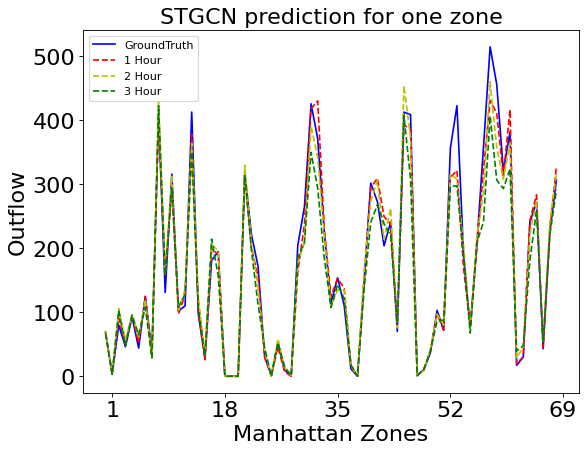

In [15]:
figure(figsize=(8, 6), dpi=80)
count = 3507
line = 1.5
plot(STGCN1_outflow_truth[0], color='b', markersize=5, linewidth=line,  label='GroundTruth')
plot(STGCN1_outflow_prediction[0], color='r', linestyle='dashed', linewidth=line, label='1 Hour')
plot(STGCN2_outflow_prediction[0], color='y', linestyle='dashed', linewidth=line, label='2 Hour')
plot(STGCN3_outflow_prediction[0], color='g', linestyle='dashed', linewidth=line, label='3 Hour')
xticks(np.linspace(1, 69, 5, endpoint=True), size=20)
yticks(fontproperties='Times New Roman', size=20)
plt.xlabel('Manhattan Zones', size=20)
plt.ylabel('Outflow', size=20)
plt.title('STGCN prediction for one zone', size=20)
plt.legend(loc='best',fontsize=10)
plt.show()

In [18]:
DCRNN_inflow_truth = np.load('DCRNN_taxi_inflow_groundtruth.npy')
DCRNN_inflow_prediction = np.load('DCRNN_taxi_inflow_prediction.npy')
DCRNN_inflow_truth.shape

(3507, 3, 69)

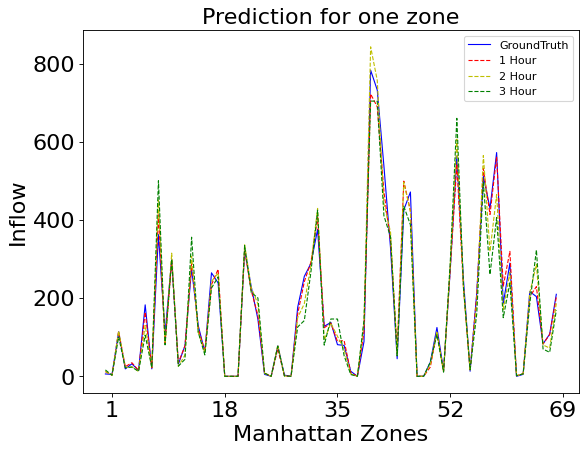

In [20]:
DCRNN1_inflow_truth = DCRNN_inflow_truth[0,0,:]
DCRNN2_inflow_truth = DCRNN_inflow_truth[0,1,:]
DCRNN3_inflow_truth = DCRNN_inflow_truth[0,2,:]
DCRNN1_inflow_prediction = DCRNN_inflow_prediction[0,0,:]
DCRNN2_inflow_prediction = DCRNN_inflow_prediction[0,1,:]
DCRNN3_inflow_prediction = DCRNN_inflow_prediction[0,2,:]
figure(figsize=(8, 6), dpi=80)
count = 3507
line = 1
plot(DCRNN1_inflow_truth, color='b', markersize=5, linewidth=line,  label='GroundTruth')
# plot(prediction, color='r', linestyle='dashed', linewidth=line, label='Prediction_Inter-ST')
plot(DCRNN1_inflow_prediction, color='r', linestyle='dashed', linewidth=line, label='1 Hour')
plot(DCRNN2_inflow_prediction, color='y', linestyle='dashed', linewidth=line, label='2 Hour')
plot(DCRNN3_inflow_prediction, color='g', linestyle='dashed', linewidth=line, label='3 Hour')
xticks(np.linspace(1, 69, 5, endpoint=True), size=20)
yticks(fontproperties='Times New Roman', size=20)
plt.xlabel('Manhattan Zones', size=20)
plt.ylabel('Inflow', size=20)
plt.title('Prediction for one zone', size=20)
plt.legend(loc='best',fontsize=10)
plt.show()

In [21]:
DCRNN_outflow_truth = np.load('DCRNN_taxi_outflow_groundtruth.npy')
DCRNN_outflow_prediction = np.load('DCRNN_taxi_outflow_prediction.npy')

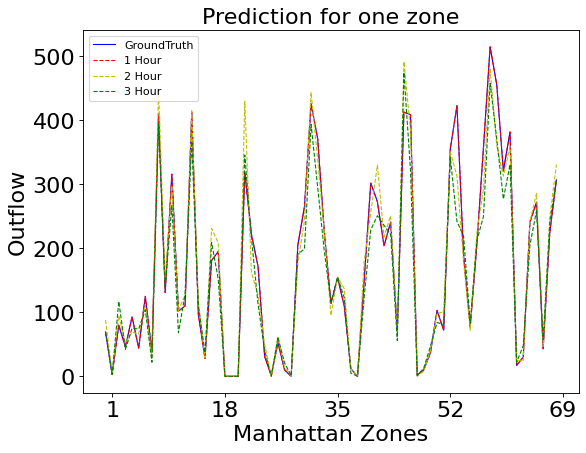

In [26]:
DCRNN1_outflow_truth = DCRNN_outflow_truth[0,0,:]
DCRNN2_outflow_truth = DCRNN_outflow_truth[0,1,:]
DCRNN3_outflow_truth = DCRNN_outflow_truth[0,2,:]
DCRNN1_outflow_prediction = DCRNN_outflow_prediction[0,0,:]
DCRNN2_outflow_prediction = DCRNN_outflow_prediction[0,1,:]
DCRNN3_outflow_prediction = DCRNN_outflow_prediction[0,2,:]
figure(figsize=(8, 6), dpi=80)
count = 3507
line = 1
plot(DCRNN1_outflow_truth, color='b', markersize=5, linewidth=line,  label='GroundTruth')
# plot(prediction, color='r', linestyle='dashed', linewidth=line, label='Prediction_Inter-ST')
plot(DCRNN1_outflow_truth, color='r', linestyle='dashed', linewidth=line, label='1 Hour')
plot(DCRNN2_outflow_truth, color='y', linestyle='dashed', linewidth=line, label='2 Hour')
plot(DCRNN3_outflow_truth, color='g', linestyle='dashed', linewidth=line, label='3 Hour')
xticks(np.linspace(1, 69, 5, endpoint=True), size=20)
yticks(fontproperties='Times New Roman', size=20)
plt.xlabel('Manhattan Zones', size=20)
plt.ylabel('Outflow', size=20)
plt.title('Prediction for one zone', size=20)
plt.legend(loc='best',fontsize=10)
plt.show()

In [27]:
Graph_WaveNet_inflow_truth = np.load('GraphWaveNet_taxi_inflow_groundtruth.npy')
Graph_WaveNet_inflow_prediction = np.load('GraphWaveNet_taxi_inflow_prediction.npy')

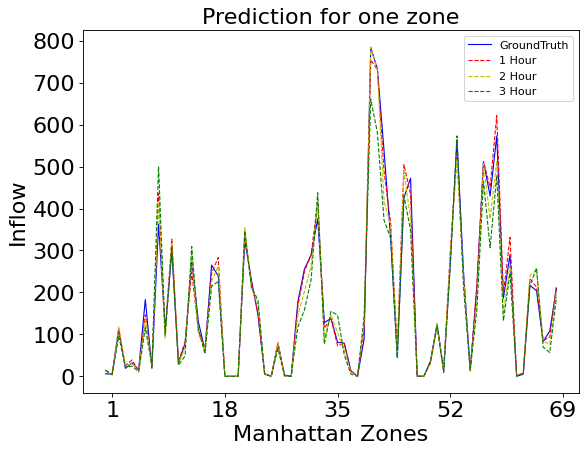

In [28]:
Graph_WaveNet1_inflow_truth = Graph_WaveNet_inflow_truth[0,0,:]
Graph_WaveNet2_inflow_truth = Graph_WaveNet_inflow_truth[0,1,:]
Graph_WaveNet3_inflow_truth = Graph_WaveNet_inflow_truth[0,2,:]
Graph_WaveNet1_inflow_prediction = Graph_WaveNet_inflow_prediction[0,0,:]
Graph_WaveNet2_inflow_prediction = Graph_WaveNet_inflow_prediction[0,1,:]
Graph_WaveNet3_inflow_prediction = Graph_WaveNet_inflow_prediction[0,2,:]
figure(figsize=(8, 6), dpi=80)
count = 3507
line = 1
plot(Graph_WaveNet1_inflow_truth, color='b', markersize=5, linewidth=line,  label='GroundTruth')
# plot(prediction, color='r', linestyle='dashed', linewidth=line, label='Prediction_Inter-ST')
plot(Graph_WaveNet1_inflow_prediction, color='r', linestyle='dashed', linewidth=line, label='1 Hour')
plot(Graph_WaveNet2_inflow_prediction, color='y', linestyle='dashed', linewidth=line, label='2 Hour')
plot(Graph_WaveNet3_inflow_prediction, color='g', linestyle='dashed', linewidth=line, label='3 Hour')
xticks(np.linspace(1, 69, 5, endpoint=True), size=20)
yticks(fontproperties='Times New Roman', size=20)
plt.xlabel('Manhattan Zones', size=20)
plt.ylabel('Inflow', size=20)
plt.title('Prediction for one zone', size=20)
plt.legend(loc='best',fontsize=10)
plt.show()

In [29]:
Graph_WaveNet_outflow_truth = np.load('GraphWaveNet_taxi_outflow_groundtruth.npy')
Graph_WaveNet_outflow_prediction = np.load('GraphWaveNet_taxi_outflow_prediction.npy')

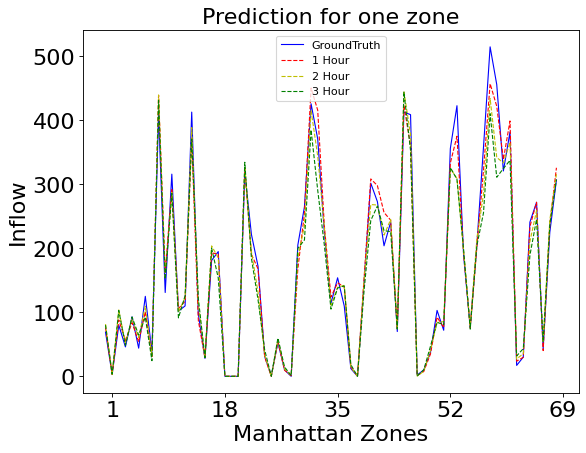

In [30]:
Graph_WaveNet1_outflow_truth = Graph_WaveNet_outflow_truth[0,0,:]
Graph_WaveNet2_outflow_truth = Graph_WaveNet_outflow_truth[0,1,:]
Graph_WaveNet3_outflow_truth = Graph_WaveNet_outflow_truth[0,2,:]
Graph_WaveNet1_outflow_prediction = Graph_WaveNet_outflow_prediction[0,0,:]
Graph_WaveNet2_outflow_prediction = Graph_WaveNet_outflow_prediction[0,1,:]
Graph_WaveNet3_outflow_prediction = Graph_WaveNet_outflow_prediction[0,2,:]
figure(figsize=(8, 6), dpi=80)
count = 3507
line = 1
plot(Graph_WaveNet1_outflow_truth, color='b', markersize=5, linewidth=line,  label='GroundTruth')
# plot(prediction, color='r', linestyle='dashed', linewidth=line, label='Prediction_Inter-ST')
plot(Graph_WaveNet1_outflow_prediction, color='r', linestyle='dashed', linewidth=line, label='1 Hour')
plot(Graph_WaveNet2_outflow_prediction, color='y', linestyle='dashed', linewidth=line, label='2 Hour')
plot(Graph_WaveNet3_outflow_prediction, color='g', linestyle='dashed', linewidth=line, label='3 Hour')
xticks(np.linspace(1, 69, 5, endpoint=True), size=20)
yticks(fontproperties='Times New Roman', size=20)
plt.xlabel('Manhattan Zones', size=20)
plt.ylabel('Inflow', size=20)
plt.title('Prediction for one zone', size=20)
plt.legend(loc='best',fontsize=10)
plt.show()

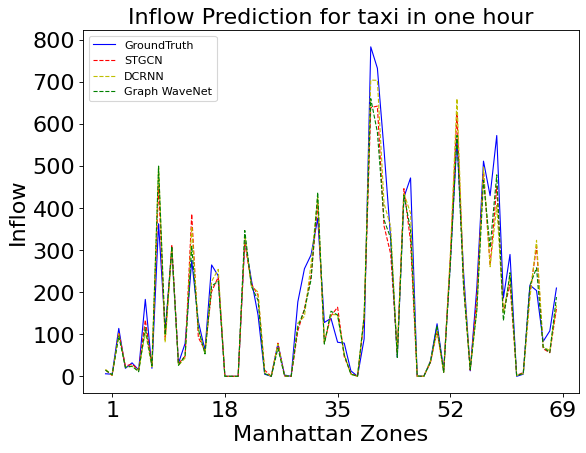

In [63]:
figure(figsize=(8, 6), dpi=80)
count = 3507
line = 1
plot(STGCN1_inflow_truth[0], color='b', markersize=5, linewidth=line,  label='GroundTruth')
# plot(prediction, color='r', linestyle='dashed', linewidth=line, label='Prediction_Inter-ST')
plot(STGCN3_inflow_prediction[0], color='r', linestyle='dashed', linewidth=line, label='STGCN')
plot(DCRNN3_inflow_prediction, color='y', linestyle='dashed', linewidth=line, label='DCRNN')
plot(Graph_WaveNet3_inflow_prediction, color='g', linestyle='dashed', linewidth=line, label='Graph WaveNet')
xticks(np.linspace(1, 69, 5, endpoint=True), size=20)
yticks(fontproperties='Times New Roman', size=20)
plt.xlabel('Manhattan Zones', size=20)
plt.ylabel('Inflow', size=20)
plt.title('Inflow Prediction for taxi in one hour', size=20)
plt.legend(loc='best',fontsize=10)
plt.savefig('compare_taxi_inflow_zone.pdf', dpi=600, bbox_inches='tight')
plt.show()

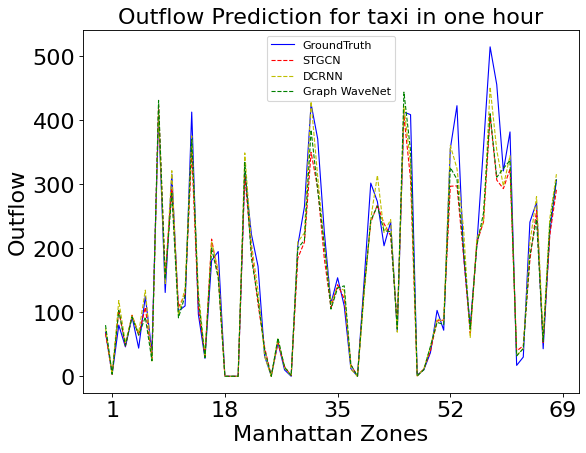

In [64]:
figure(figsize=(8, 6), dpi=80)
count = 3507
line = 1
plot(STGCN1_outflow_truth[0], color='b', markersize=5, linewidth=line,  label='GroundTruth')
# plot(prediction, color='r', linestyle='dashed', linewidth=line, label='Prediction_Inter-ST')
plot(STGCN3_outflow_prediction[0], color='r', linestyle='dashed', linewidth=line, label='STGCN')
plot(DCRNN3_outflow_prediction, color='y', linestyle='dashed', linewidth=line, label='DCRNN')
plot(Graph_WaveNet3_outflow_prediction, color='g', linestyle='dashed', linewidth=line, label='Graph WaveNet')
xticks(np.linspace(1, 69, 5, endpoint=True), size=20)
yticks(fontproperties='Times New Roman', size=20)
plt.xlabel('Manhattan Zones', size=20)
plt.ylabel('Outflow', size=20)
plt.title('Outflow Prediction for taxi in one hour', size=20)
plt.legend(loc='best',fontsize=10)
plt.savefig('compare_taxi_outflow_zone.pdf', dpi=600, bbox_inches='tight')
plt.show()

In [45]:
STGCN1_inflow_truth[:100,0].shape

(100,)

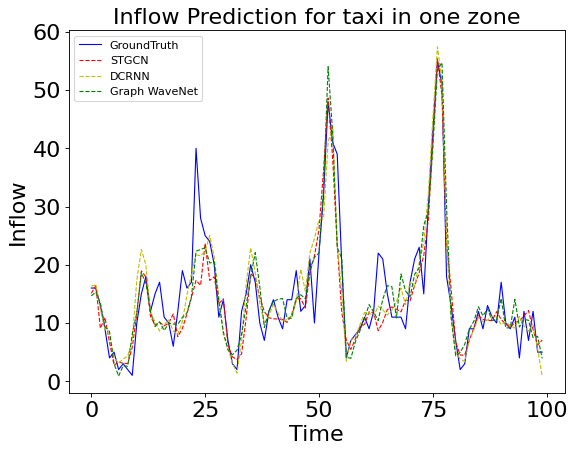

In [65]:
figure(figsize=(8, 6), dpi=80)
count = 3507
line = 1
plot(STGCN3_inflow_truth[:100,0], color='b', markersize=5, linewidth=line,  label='GroundTruth')
plot(STGCN3_inflow_prediction[:100,0], color='r', linestyle='dashed', linewidth=line, label='STGCN')
plot(DCRNN_inflow_prediction[:100,2,0], color='y', linestyle='dashed', linewidth=line, label='DCRNN')
plot(Graph_WaveNet_inflow_prediction[:100,2,0], color='g', linestyle='dashed', linewidth=line, label='Graph WaveNet')
xticks(np.linspace(0, 100, 5, endpoint=True), size=20)
yticks(fontproperties='Times New Roman', size=20)
plt.xlabel('Time', size=20)
plt.ylabel('Inflow', size=20)
plt.title('Inflow Prediction for taxi in one zone', size=20)
plt.legend(loc='best',fontsize=10)
plt.savefig('compare_taxi_inflow_time.pdf', dpi=600, bbox_inches='tight')
plt.show()

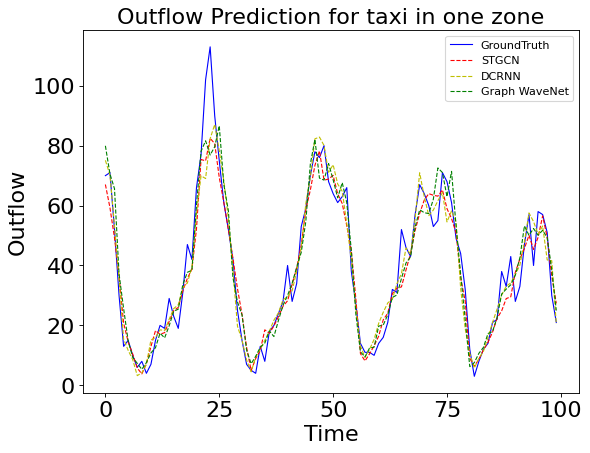

In [87]:
figure(figsize=(8, 6), dpi=80)
count = 3507
line = 1
plot(STGCN3_outflow_truth[:100,0], color='b', markersize=5, linewidth=line,  label='GroundTruth')
plot(STGCN3_outflow_prediction[:100,0], color='r', linestyle='dashed', linewidth=line, label='STGCN')
plot(DCRNN_outflow_prediction[:100,2,0], color='y', linestyle='dashed', linewidth=line, label='DCRNN')
plot(Graph_WaveNet_outflow_prediction[:100,2,0], color='g', linestyle='dashed', linewidth=line, label='Graph WaveNet')
xticks(np.linspace(0, 100, 5, endpoint=True), size=20)
yticks(fontproperties='Times New Roman', size=20)
plt.xlabel('Time', size=20)
plt.ylabel('Outflow', size=20)
plt.title('Outflow Prediction for taxi in one zone', size=20)
plt.legend(loc='best',fontsize=10)
plt.savefig('compare_taxi_outflow_time.pdf', dpi=600, bbox_inches='tight')
plt.show()

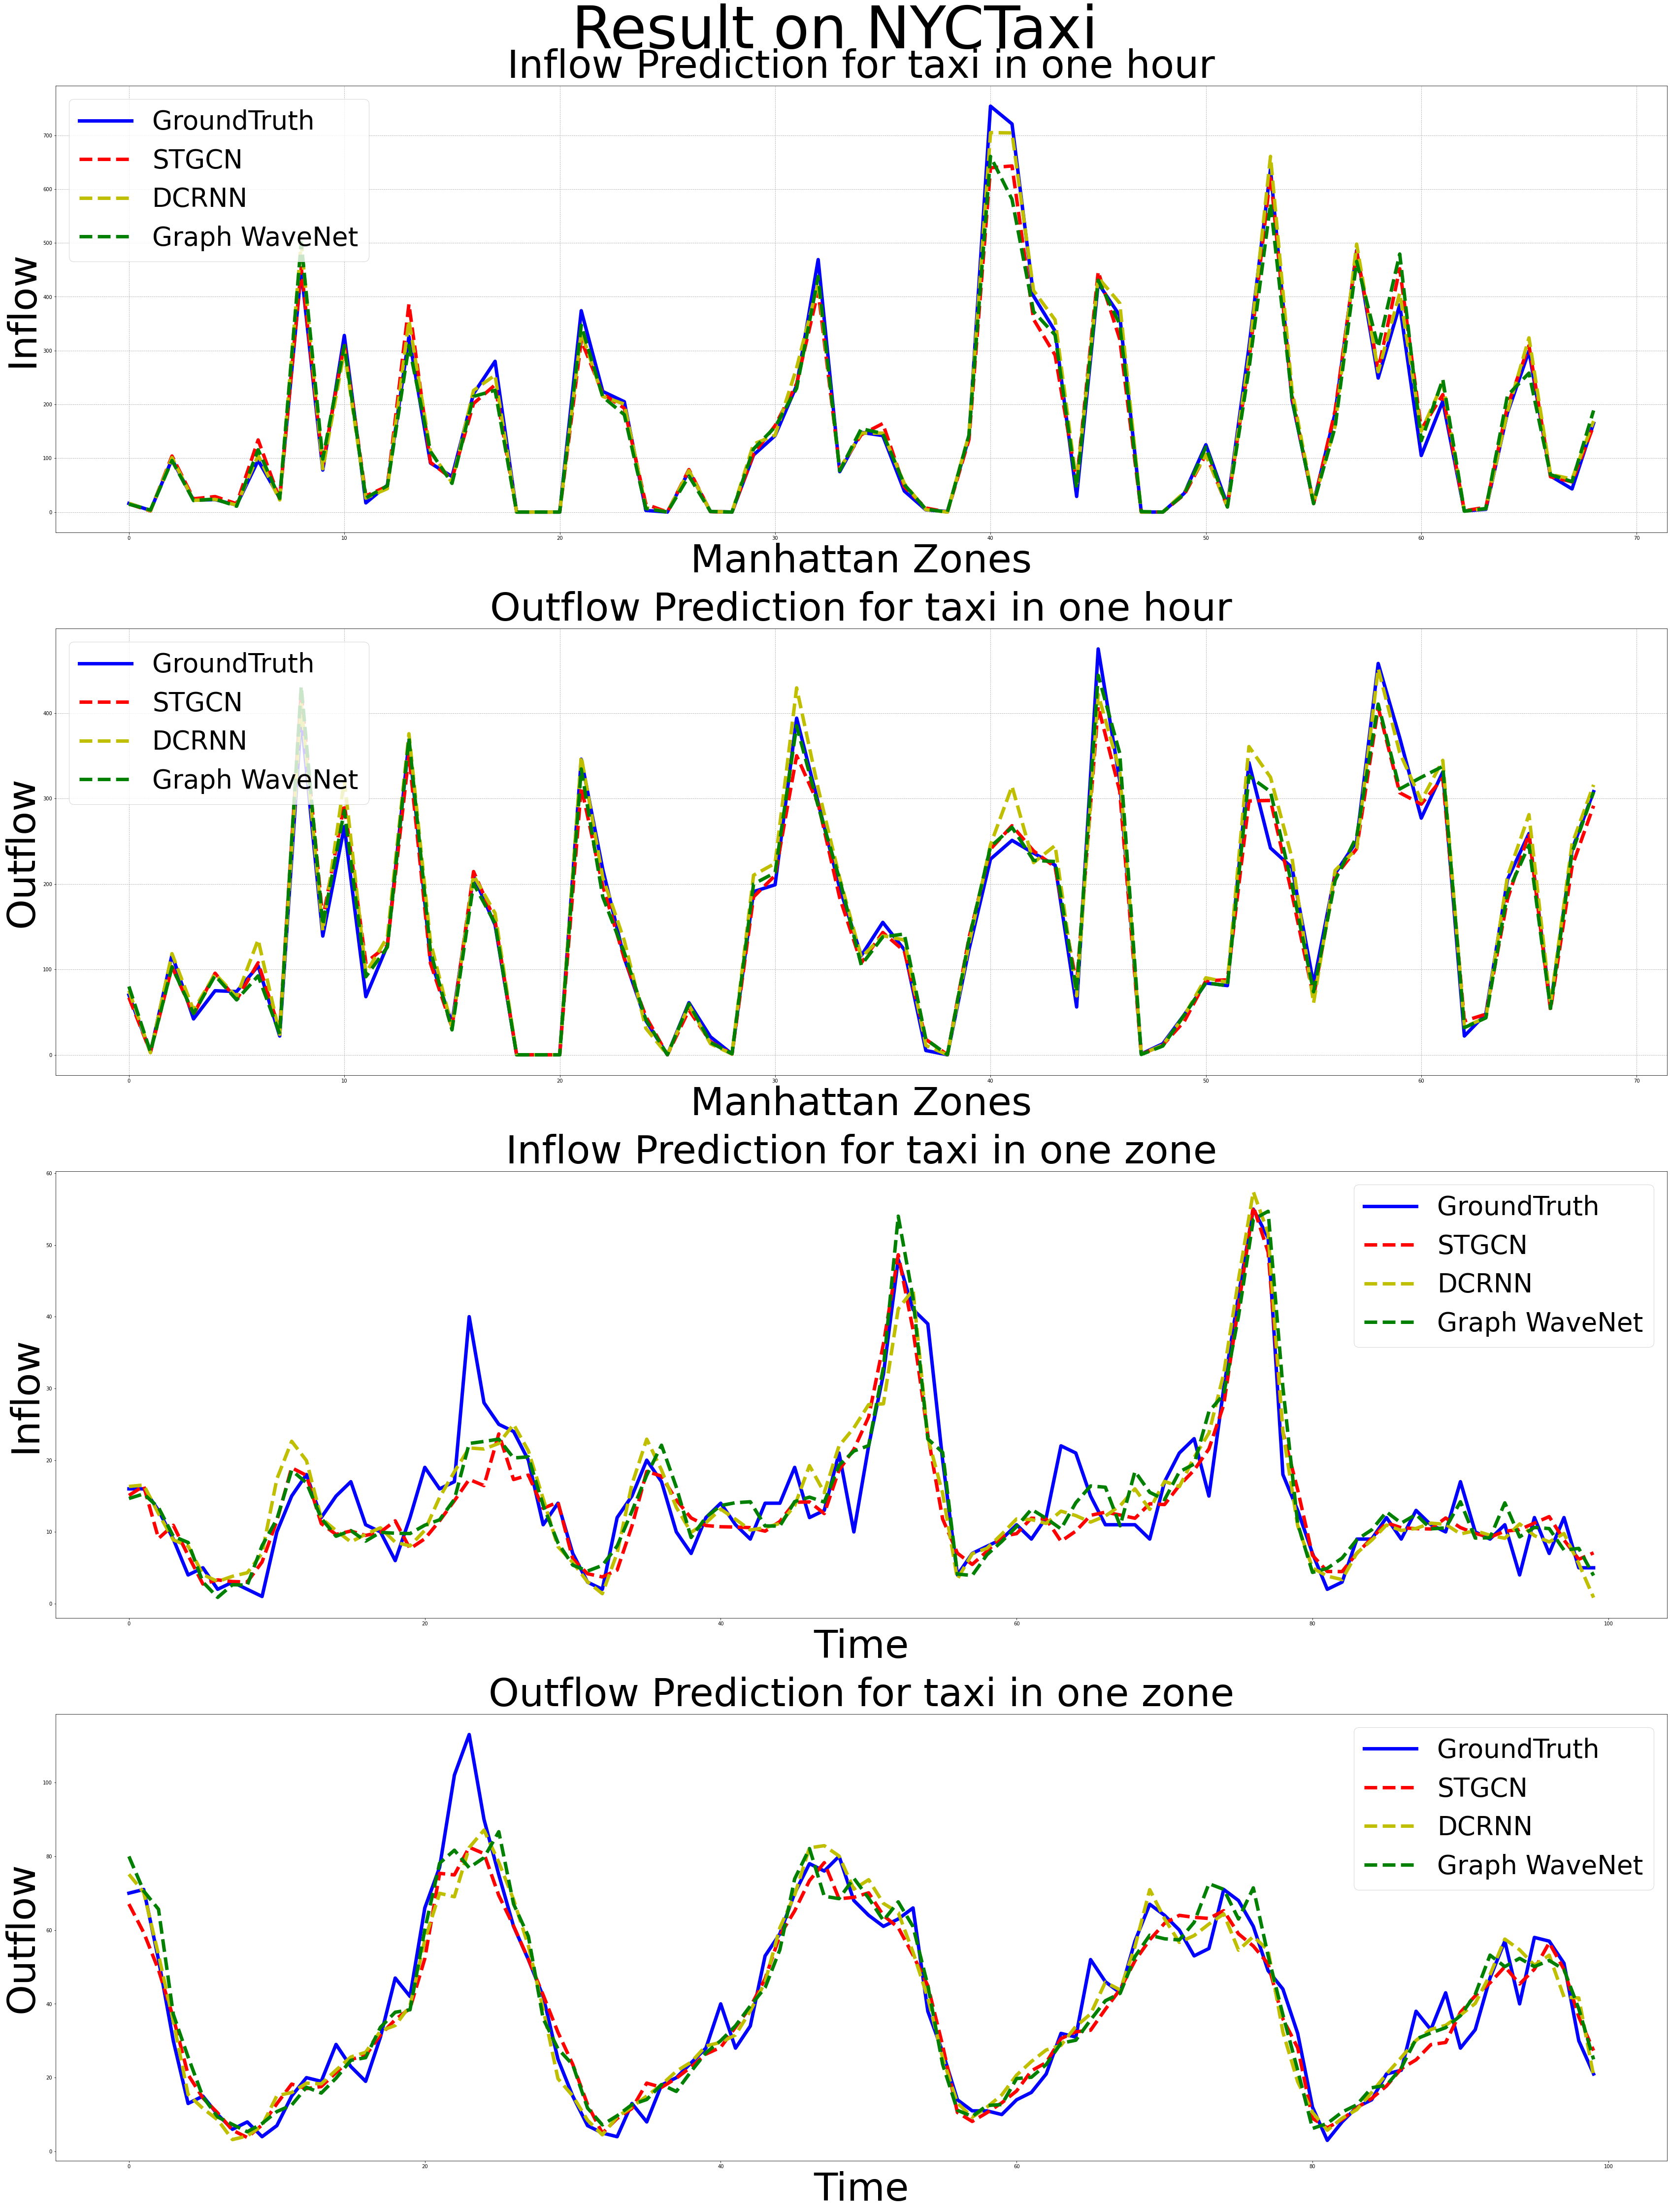

In [88]:
fig = plt.figure(constrained_layout=True, figsize=(47, 61))
spec2 = gridspec.GridSpec(nrows=4, ncols=1,figure=fig)
fig.suptitle('Result on NYCTaxi', fontsize=120,y=1.02)
axs, nrows,ncols=[],4,1
for i in range(nrows):
    for j in range(ncols):
        axs.append(fig.add_subplot(spec2[i, j]))
        
label_fontsize = 79
title_fontsize = 79
legend_fontsize = 53
line = 7

axs[0].plot(STGCN3_inflow_truth[0], color='b', markersize=5, linewidth=line,  label='GroundTruth')
axs[0].plot(STGCN3_inflow_prediction[0], color='r', linestyle='dashed', linewidth=line, label='STGCN')
axs[0].plot(DCRNN3_inflow_prediction, color='y', linestyle='dashed', linewidth=line, label='DCRNN')
axs[0].plot(Graph_WaveNet3_inflow_prediction, color='g', linestyle='dashed', linewidth=line, label='Graph WaveNet')
axs[0].set_xlabel('Manhattan Zones', fontsize=label_fontsize)
axs[0].set_ylabel('Inflow', fontsize=label_fontsize)
axs[0].set_title('Inflow Prediction for taxi in one hour', fontsize=title_fontsize)
axs[0].legend(loc='best',fontsize=legend_fontsize)
axs[0].grid(ls='--')

axs[1].plot(STGCN3_outflow_truth[0], color='b', markersize=5, linewidth=line,  label='GroundTruth')
axs[1].plot(STGCN3_outflow_prediction[0], color='r', linestyle='dashed', linewidth=line, label='STGCN')
axs[1].plot(DCRNN3_outflow_prediction, color='y', linestyle='dashed', linewidth=line, label='DCRNN')
axs[1].plot(Graph_WaveNet3_outflow_prediction, color='g', linestyle='dashed', linewidth=line, label='Graph WaveNet')
axs[1].set_xlabel('Manhattan Zones',fontsize=label_fontsize)
axs[1].set_ylabel('Outflow', fontsize=label_fontsize)
axs[1].set_title('Outflow Prediction for taxi in one hour', fontsize=title_fontsize)
axs[1].legend(loc='best',fontsize=legend_fontsize)
axs[1].grid(ls='--')

axs[2].plot(STGCN3_inflow_truth[:100,0], color='b', markersize=5, linewidth=line,  label='GroundTruth')
axs[2].plot(STGCN3_inflow_prediction[:100,0], color='r', linestyle='dashed', linewidth=line, label='STGCN')
axs[2].plot(DCRNN_inflow_prediction[:100,2,0], color='y', linestyle='dashed', linewidth=line, label='DCRNN')
axs[2].plot(Graph_WaveNet_inflow_prediction[:100,2,0], color='g', linestyle='dashed', linewidth=line, label='Graph WaveNet')
# xticks(np.linspace(0, 100, 5, endpoint=True), size=20)
# yticks(fontproperties='Times New Roman', size=20)
axs[2].set_xlabel('Time', fontsize=label_fontsize)
axs[2].set_ylabel('Inflow', fontsize=label_fontsize)
axs[2].set_title('Inflow Prediction for taxi in one zone', fontsize=title_fontsize)
axs[2].legend(loc='best',fontsize=legend_fontsize)

axs[3].plot(STGCN3_outflow_truth[:100,0], color='b', markersize=5, linewidth=line,  label='GroundTruth')
# plot(prediction, color='r', linestyle='dashed', linewidth=line, label='Prediction_Inter-ST')
axs[3].plot(STGCN3_outflow_prediction[:100,0], color='r', linestyle='dashed', linewidth=line, label='STGCN')
axs[3].plot(DCRNN_outflow_prediction[:100,2,0], color='y', linestyle='dashed', linewidth=line, label='DCRNN')
axs[3].plot(Graph_WaveNet_outflow_prediction[:100,2,0], color='g', linestyle='dashed', linewidth=line, label='Graph WaveNet')
# xticks(np.linspace(0, 100, 5, endpoint=True), size=20)
# yticks(fontproperties='Times New Roman', size=20)
axs[3].set_xlabel('Time', fontsize=label_fontsize)
axs[3].set_ylabel('Outflow', fontsize=label_fontsize)
axs[3].set_title('Outflow Prediction for taxi in one zone', fontsize=title_fontsize)
axs[3].legend(loc='best',fontsize=legend_fontsize)
plt.savefig('compare_result_taxi.pdf', dpi=600, bbox_inches='tight')
plt.show()

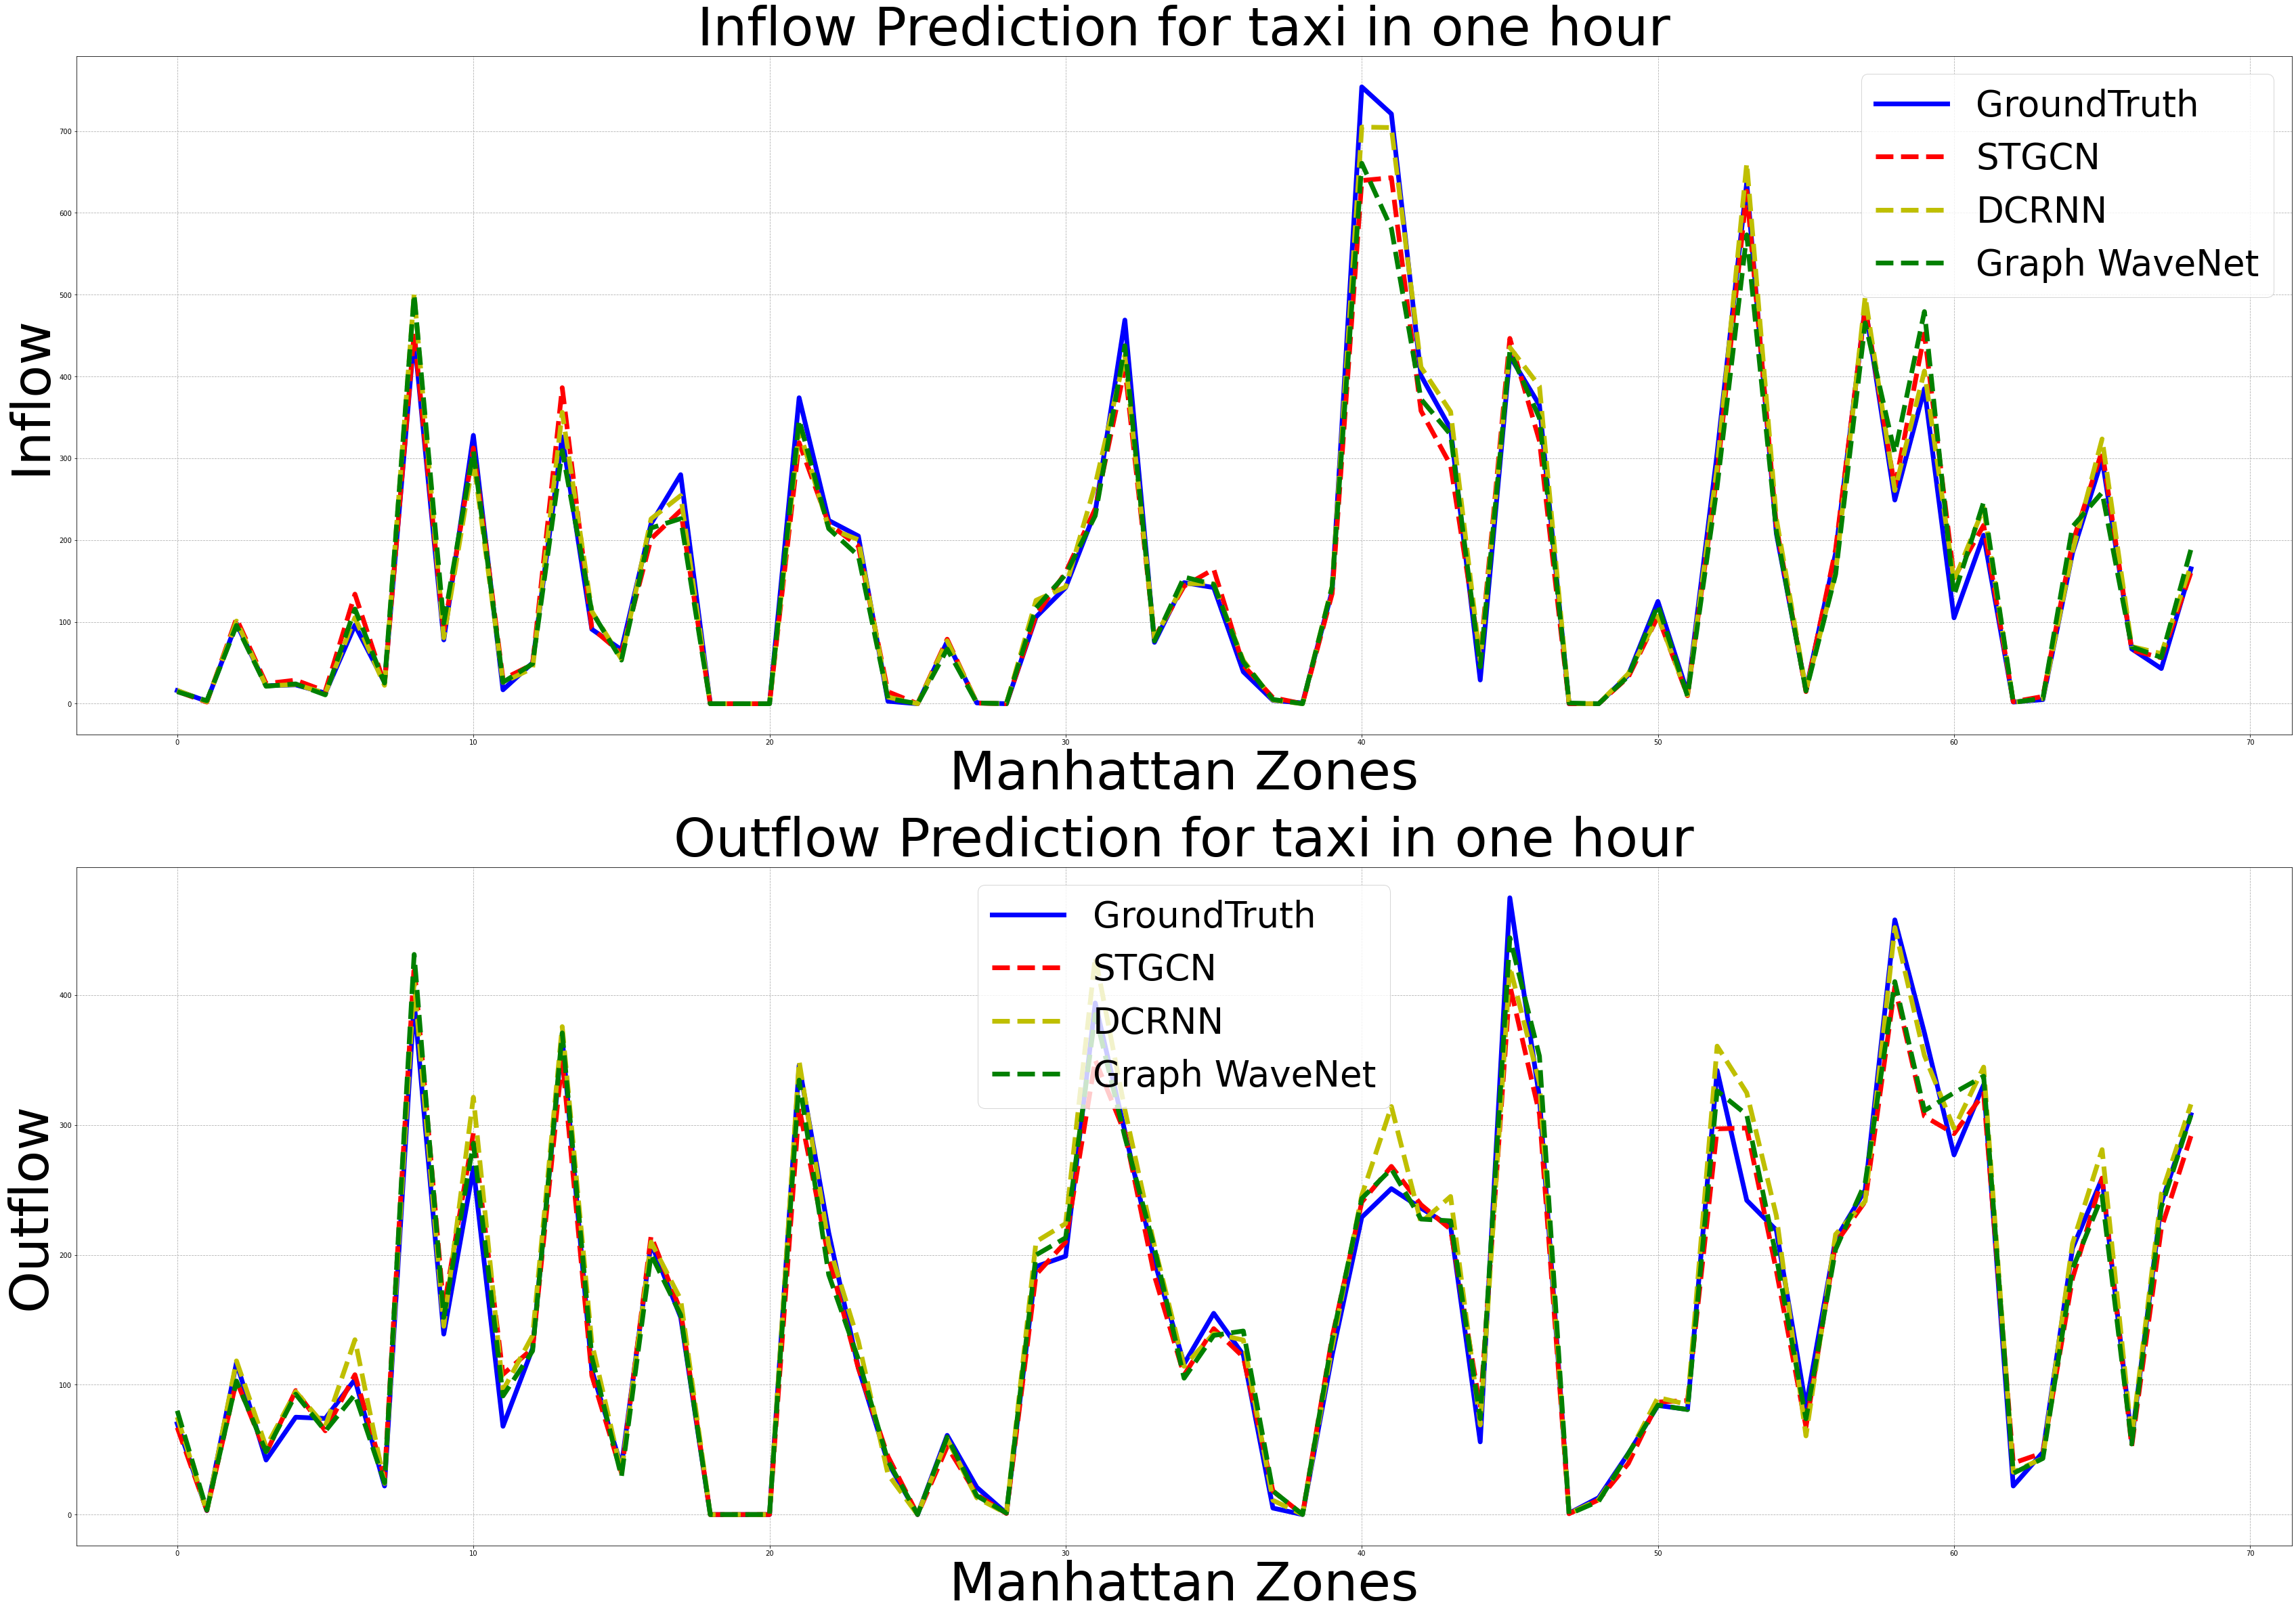

In [93]:
fig = plt.figure(constrained_layout=True, figsize=(47, 61))
spec2 = gridspec.GridSpec(nrows=4, ncols=1,figure=fig)
# fig.suptitle('Result on NYCTaxi in one hour', fontsize=120,y=1.02)
axs, nrows,ncols=[],2,1
for i in range(nrows):
    for j in range(ncols):
        axs.append(fig.add_subplot(spec2[i, j]))
        
label_fontsize = 79
title_fontsize = 79
legend_fontsize = 53
line = 7

axs[0].plot(STGCN3_inflow_truth[0], color='b', markersize=5, linewidth=line,  label='GroundTruth')
axs[0].plot(STGCN3_inflow_prediction[0], color='r', linestyle='dashed', linewidth=line, label='STGCN')
axs[0].plot(DCRNN3_inflow_prediction, color='y', linestyle='dashed', linewidth=line, label='DCRNN')
axs[0].plot(Graph_WaveNet3_inflow_prediction, color='g', linestyle='dashed', linewidth=line, label='Graph WaveNet')
axs[0].set_xlabel('Manhattan Zones', fontsize=label_fontsize)
axs[0].set_ylabel('Inflow', fontsize=label_fontsize)
axs[0].set_title('Inflow Prediction for taxi in one hour', fontsize=title_fontsize)
axs[0].legend(loc='best',fontsize=legend_fontsize)
axs[0].grid(ls='--')

axs[1].plot(STGCN3_outflow_truth[0], color='b', markersize=5, linewidth=line,  label='GroundTruth')
axs[1].plot(STGCN3_outflow_prediction[0], color='r', linestyle='dashed', linewidth=line, label='STGCN')
axs[1].plot(DCRNN3_outflow_prediction, color='y', linestyle='dashed', linewidth=line, label='DCRNN')
axs[1].plot(Graph_WaveNet3_outflow_prediction, color='g', linestyle='dashed', linewidth=line, label='Graph WaveNet')
axs[1].set_xlabel('Manhattan Zones',fontsize=label_fontsize)
axs[1].set_ylabel('Outflow', fontsize=label_fontsize)
axs[1].set_title('Outflow Prediction for taxi in one hour', fontsize=title_fontsize)
axs[1].legend(loc='best',fontsize=legend_fontsize)
axs[1].grid(ls='--')

plt.savefig('compare_result_taxi_one_hour.pdf', dpi=600, bbox_inches='tight')
plt.show()

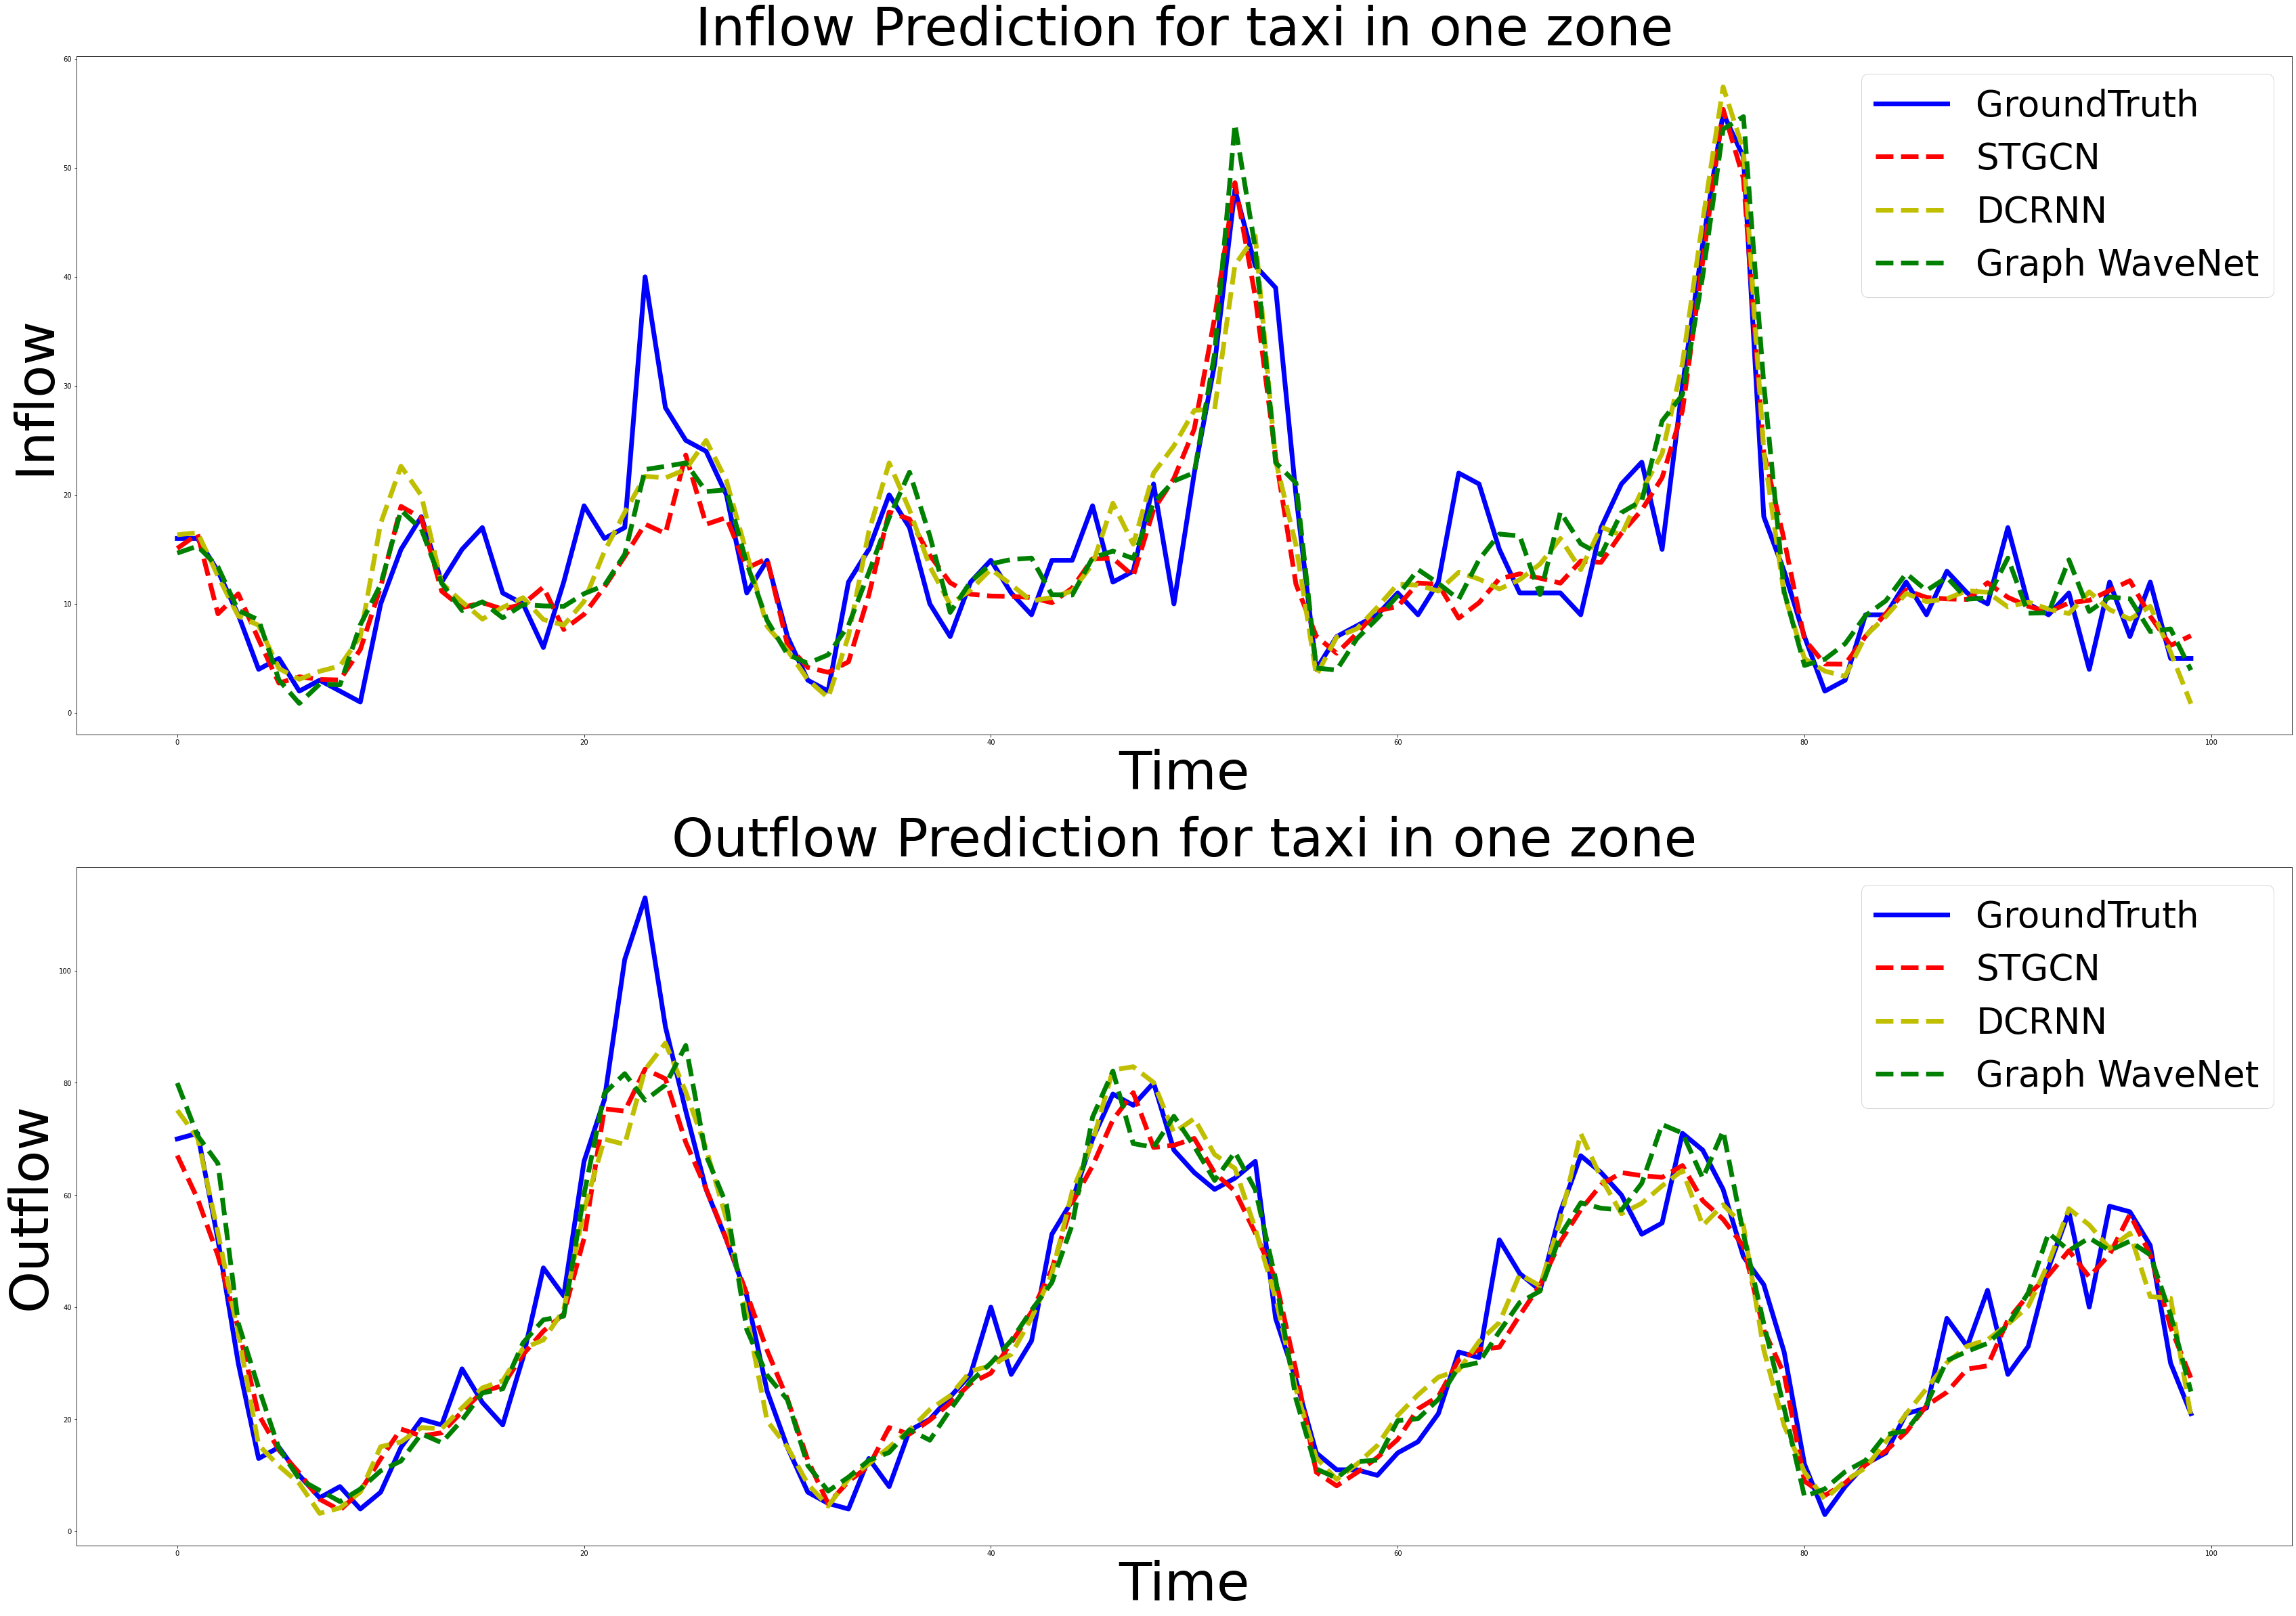

In [94]:
fig = plt.figure(constrained_layout=True, figsize=(47, 61))
spec2 = gridspec.GridSpec(nrows=4, ncols=1,figure=fig)
# fig.suptitle('Result on NYCTaxi in one zone', fontsize=120,y=1.02)
axs, nrows,ncols=[],2,1
for i in range(nrows):
    for j in range(ncols):
        axs.append(fig.add_subplot(spec2[i, j]))
        
label_fontsize = 79
title_fontsize = 79
legend_fontsize = 53
line = 7

axs[0].plot(STGCN3_inflow_truth[:100,0], color='b', markersize=5, linewidth=line,  label='GroundTruth')
axs[0].plot(STGCN3_inflow_prediction[:100,0], color='r', linestyle='dashed', linewidth=line, label='STGCN')
axs[0].plot(DCRNN_inflow_prediction[:100,2,0], color='y', linestyle='dashed', linewidth=line, label='DCRNN')
axs[0].plot(Graph_WaveNet_inflow_prediction[:100,2,0], color='g', linestyle='dashed', linewidth=line, label='Graph WaveNet')
axs[0].set_xlabel('Time', fontsize=label_fontsize)
axs[0].set_ylabel('Inflow', fontsize=label_fontsize)
axs[0].set_title('Inflow Prediction for taxi in one zone', fontsize=title_fontsize)
axs[0].legend(loc='best',fontsize=legend_fontsize)

axs[1].plot(STGCN3_outflow_truth[:100,0], color='b', markersize=5, linewidth=line,  label='GroundTruth')
axs[1].plot(STGCN3_outflow_prediction[:100,0], color='r', linestyle='dashed', linewidth=line, label='STGCN')
axs[1].plot(DCRNN_outflow_prediction[:100,2,0], color='y', linestyle='dashed', linewidth=line, label='DCRNN')
axs[1].plot(Graph_WaveNet_outflow_prediction[:100,2,0], color='g', linestyle='dashed', linewidth=line, label='Graph WaveNet')
axs[1].set_xlabel('Time', fontsize=label_fontsize)
axs[1].set_ylabel('Outflow', fontsize=label_fontsize)
axs[1].set_title('Outflow Prediction for taxi in one zone', fontsize=title_fontsize)
axs[1].legend(loc='best',fontsize=legend_fontsize)

plt.savefig('compare_result_taxi_one_zone.pdf', dpi=600, bbox_inches='tight')
plt.show()